In [1]:
%matplotlib inline
from __future__ import division, print_function
from six import StringIO
import xml.etree.ElementTree as etree
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import requests

from svgpath2mpl import parse_path

In [2]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/f/fd/Ghostscript_Tiger.svg')

In [3]:
r = requests.get('https://upload.wikimedia.org/wikipedia/commons/f/fd/Ghostscript_Tiger.svg')
tree = etree.parse(StringIO(r.text))
parent_map = {c:p for p in tree.iter() for c in p}
root = tree.getroot()
path_elems = root.findall('.//{http://www.w3.org/2000/svg}path')
width = 900
height = 900
trans = transforms.Affine2D().from_values(1.7656463, 0, 0, 1.7656463, 324.90716, 255.00942)

In [4]:
def normalize_hex(c):
    if c.startswith('#') and len(c) == 4:
        return '#{0}{0}{1}{1}{2}{2}'.format(c[1], c[2], c[3])
    return c

paths = []
facecolors = []
edgecolors = []
linewidths = []
for elem in path_elems:
    g = parent_map[elem]
    p = parse_path(elem.attrib['d'])
    paths.append(trans.transform_path(p))
    facecolors.append(normalize_hex(g.attrib.get('fill', 'none')))
    edgecolors.append(normalize_hex(g.attrib.get('stroke', 'none')))
    linewidths.append(g.attrib.get('stroke-width', 1))
    

collection = mpl.collections.PathCollection(
    paths, 
    edgecolors=edgecolors, 
    linewidths=linewidths,
    facecolors=facecolors
)

(900, 0)

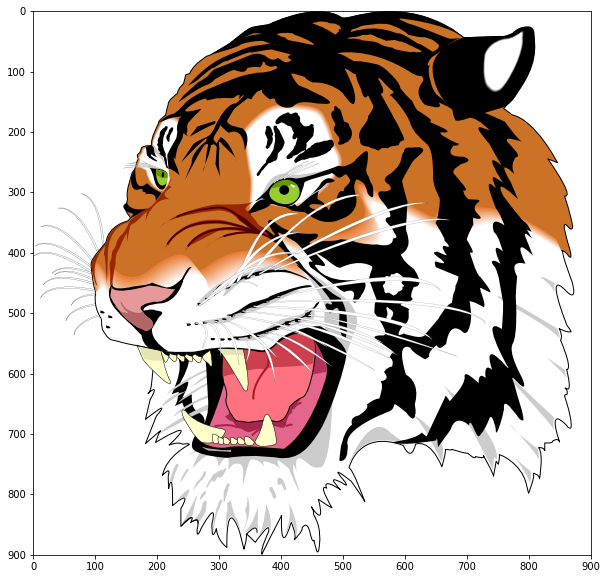

In [5]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
collection.set_transform(ax.transData)
ax.add_artist(collection)
ax.set_xlim([0, width])
ax.set_ylim([height, 0])